# Twitter Classification of Nepal earthquake tweets


### Microblogging sites like Twitter are increasingly being used for aiding relief operations during various mass emergencies. A lot of critical situational information is posted on microblogging sites during disaster events. However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity and resource availability. Hence, automated Machine Learning techniques are needed to identify the tweets that talk about the need of resources or availability of resources.

## Dataset:

### The dataset is in the form of a txt file: (ps: the text file is converted first into 'Comma Seperated Values' File to be used in this project)

### The text file contains consists 18233 number of Tweets extracted from the Social Media Website Twitter.com in the Form of:

### (Target class,Tweet id,Tweet’s text)

## Class Description:

### 0:The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)

### 1:The tweet mentions a resource that is needed (Need Tweets)

### 2:The tweet mentions a resource that is available(Availability tweets)

# Importing Libraries for Data Manipulation and Representation

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud


## Loading DataSet

In [29]:
df=pd.read_csv("train.csv", encoding="latin1")

## Let's go through the DataSet

### Top 10 rows of DataSet

In [30]:
df.head(10)

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


## Bottom 10 rows of DataSet

In [4]:
df.tail(10)

,TweetClass,TweetID,TweetText
18223,2,592684009563549696,Earthquake Nepal Indian Army takes up major re...
18224,2,592683279188361217,National disaster helpline number made operati...
18225,2,592694344655699968,Israel sends humanitarian aid to Nepal In the ...
18226,2,592697492422144000,#UttarPradesh \\u200bgovt sends buses to #Nepa...
18227,2,592696857815572481,Sikh organization to send lakh food packets to...
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [5]:
df.shape # Shows the Shape of the Dataset

(18233, 3)

In [7]:
df.columns # Display the Columns in DataSet

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

## Describe the DataSet

In [10]:
df.describe() # It describe about the basic Statistics

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [11]:
df.info() # It shows detailed info of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


## Checking for Null Values

In [12]:
df.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

## By using the Missingno Library we are checking Null Values

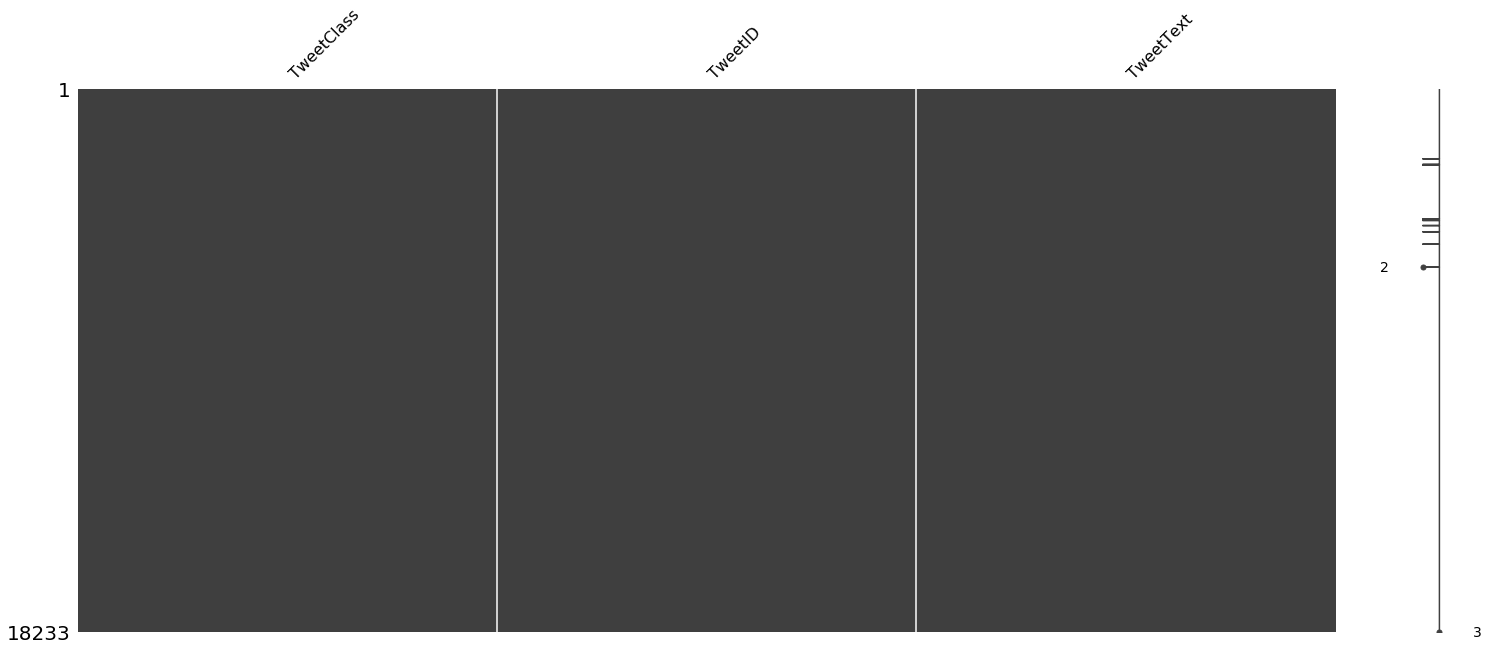

In [13]:
msno.matrix(df)

### From this we Analyse that there will be no Missing Values

## Check the Occurence of Each Category

In [14]:
df['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

### From this we can analyse that there is so Much (Irrelavant Tweets) as I have above mentioned 0 for Irrelevant 1 for Needed Tweets and 2 for Availability Tweets

## Checking For the Duplicacy

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
18203    False
18204    False
18205    False
18206    False
18207    False
18208    False
18209    False
18210    False
18211    False
18212    False
18213    False
18214    False
18215    False
18216    False
18217    False
18218    False
18219    False
18220    False
18221    False
18222    False
18223    False
18224    False
18225    False
18226    False
18227    False
18228    False
18229    False
18230    False
18231    False
18232    False
Length: 18233, dtype: bool

In [16]:
dupli=df.duplicated()
type(dupli)

pandas.core.series.Series

In [17]:
dupli.value_counts()

False    18233
dtype: int64

### As all the Duplicacy values are False means there is No Duplicate Data

In [18]:
df.loc[dupli,:]

,TweetClass,TweetID,TweetText


In [19]:
new_df=df.drop_duplicates()
new_df.describe()

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [20]:
new_df['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

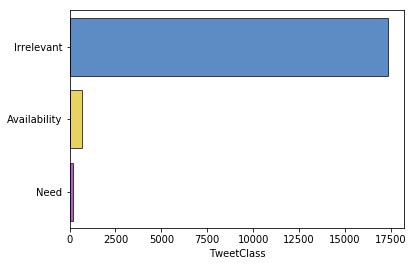

In [52]:
sns.barplot( x = df['TweetClass'].value_counts() , y = ["Irrelevant", 'Availability','Need'],palette="prism",alpha=.7,linewidth=1,edgecolor="k"*len('TweetClass'))


In [53]:
irrelevant_df=df[df['TweetClass']==0]
need_df=df[df['TweetClass']==1]
available_df=df[df['TweetClass']==2]
print(irrelevant_df.shape)
print(need_df.shape)
print(available_df.shape)

(17370, 3)
(199, 3)
(664, 3)


In [54]:
need_df.head(10) #needs tweets

,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...
17375,1,591988336090173440,Food First Aid &amp Tents would be the princip...
17376,1,591985786880327682,RightWingers of ALL religions must keep away f...
17377,1,591992896485597184,Lac Rail Neer bottles is not what Nepal needs ...
17378,1,591995052169105408,Need more resources and personnel from Army fo...
17379,1,591996373869826048,India could surely despatch -4 Field Ambulance...


## These tweets  shows about which needs Help:

In [56]:
available_df.head(10) # Avaibility Tweets

,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...
17573,2,591978159102435328,Â· Hospital Fire Brigade and Blood Banks Name ...
17574,2,591978910713139202,Just electricity is available at Shankhamul ar...
17575,2,591975873009582080,Indian Railways Ministry sending one lakh Rail...
17576,2,591976580232052736,Amount of supplies may be used for more than d...
17577,2,591975888494854145,Haryana govt to airlift 000 food packets tomor...


## These Tweets shows about the Avaibility and for Helping

In [59]:
irrelevant_df.head(10) # Irrelevant Tweets

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


## These Tweets are Irrelevant Tweets Which gives Nothing Information

# Segmenting and Visualizing the Tweets

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

irrelevant_vect=CountVectorizer(stop_words='english') #Filtering non-relevent Tweets
need_vect=CountVectorizer(stop_words='english') # Filtering Needing Tweets
available_vect=CountVectorizer(stop_words='english') # Filtering Availability Tweets
irrelevant_dtm=irrelevant_vect.fit_transform(irrelevant_df['TweetText'].values.astype('U')) #Removing: Stop word in Irrelevant tweets like a,is,the,you...
need_dtm=need_vect.fit_transform(need_df['TweetText'].values.astype('U')) # Removing Stop word in Need Tweets
available_dtm=available_vect.fit_transform(available_df['TweetText'].values.astype('U')) # Removing Stop word in Available Tweets 

irrelevant_word=irrelevant_vect.get_feature_names()
irrelevant_freqs=irrelevant_dtm.sum(axis=0).A1
irrelevant_result=dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

16177


In [62]:
need_word=need_vect.get_feature_names()
need_freqs=need_dtm.sum(axis=0).A1
need_result=dict(zip(need_word,need_freqs))
print(len(need_word))

758


In [63]:
available_word=available_vect.get_feature_names()
available_freqs=available_dtm.sum(axis=0).A1
available_result=dict(zip(available_word,available_freqs))
print(len(available_word))

1577


## Visualizing through WordCloud

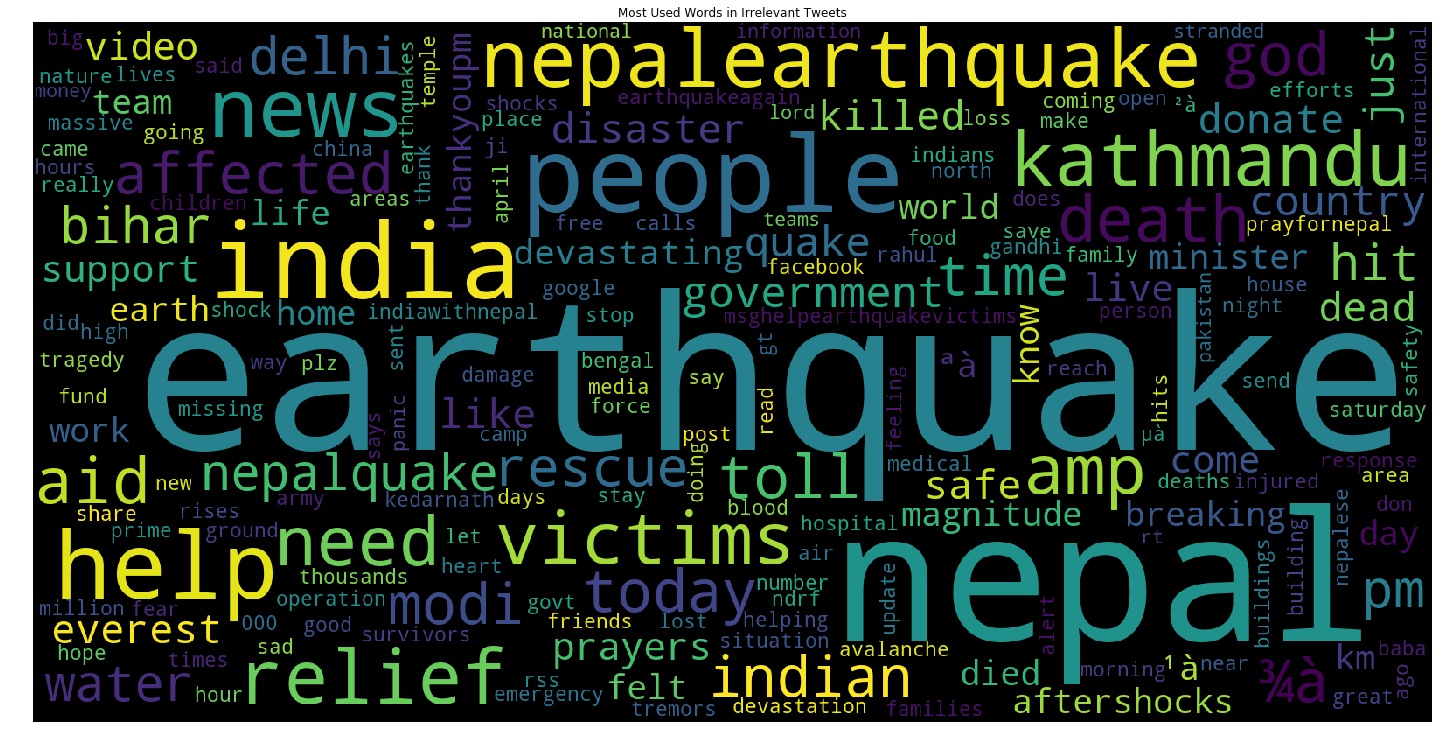

In [77]:
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(irrelevant_result)
fig=plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used Words in Irrelevant Tweets")
#fig.savefig("Irrelevant_wordcloud.png")
plt.show()

## Now we can Analyse that these are the most frequently used words in the Irrelevant tweets.

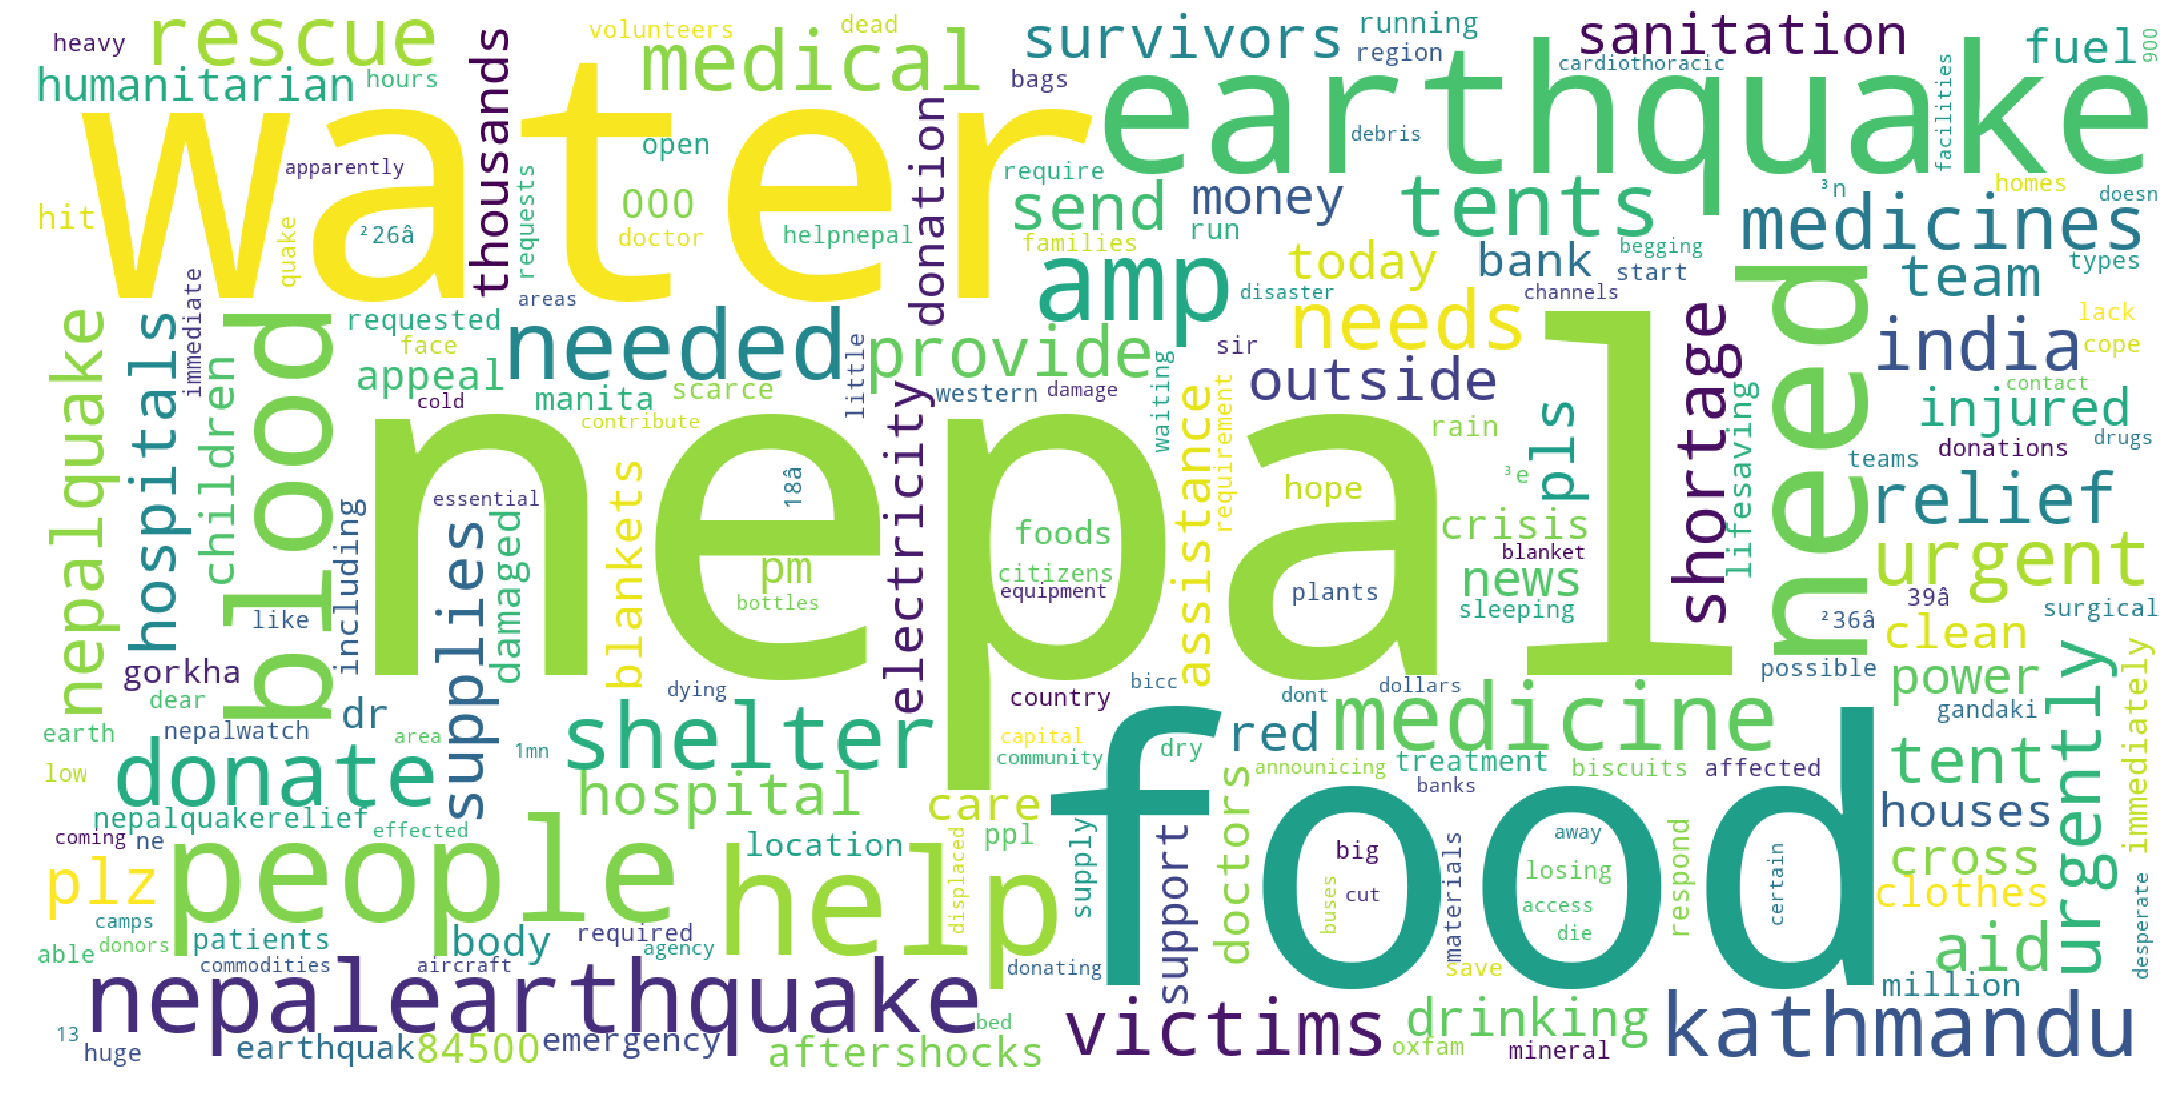

In [79]:
wordcloud=WordCloud(background_color='white',
                   width=1600,
                   height=800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("need_wordcloud.png")
plt.show()

## Now we can Analyse that these are the most frequently used words people needs

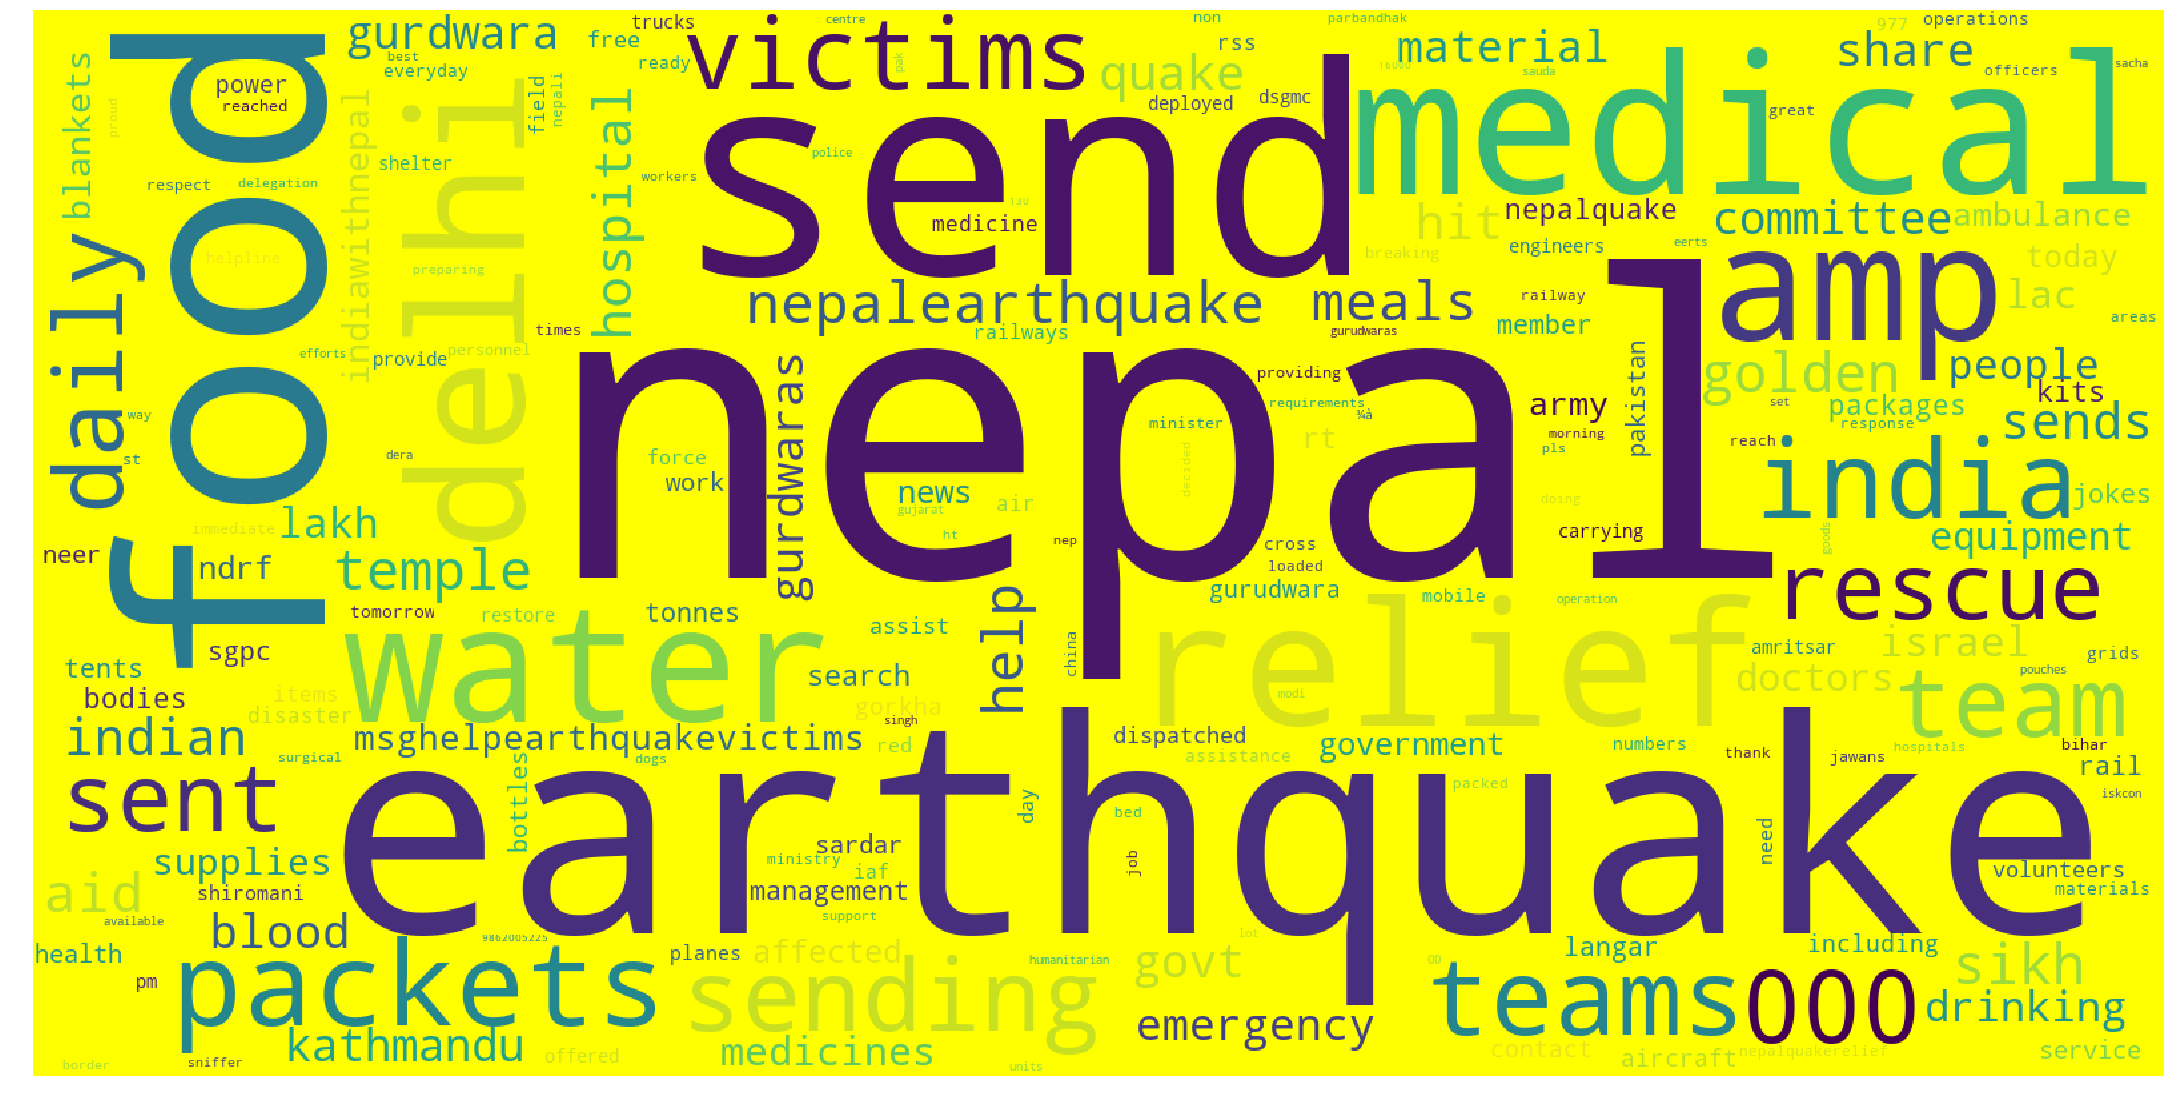

In [81]:
wordcloud=WordCloud(background_color='yellow',
                   width=1600,
                   height=800).generate_from_frequencies(available_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("available_wordcloud.png")
plt.show()

## Now we can Analyse that these are the most frequently used words which Helping or providing resources to People

In [82]:
print(len(irrelevant_df['TweetText']))
print(len(need_df['TweetText']))
print(len(available_df['TweetText']))

17370
199
664


In [83]:
df_2=(df.groupby('TweetClass')['TweetText'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_characters_per_tweet'))
print(df_2)

   TweetClass  mean_characters_per_tweet
0           0                  92.656817
1           1                  99.130653
2           2                 103.030120


In [84]:
df_3=(df.groupby('TweetClass')['TweetText'].apply(lambda x: np.sum(x.str.len())).reset_index(name='sum_characters_all_tweets'))
print(df_3)

   TweetClass  sum_characters_all_tweets
0           0                  1608615.0
1           1                    19727.0
2           2                    68412.0


## Splitting the Dataset into Train and Test parts using Stratified Shuffle Split Technique.

In [85]:
x=new_df['TweetText']
y=new_df['TweetClass']

In [86]:
from sklearn.model_selection import train_test_split
tts=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=6,stratify=y)
x_train,x_test,y_train,y_test=tts

## Using Tf-Idf Vectoriser.

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
dtm_train=vectorizer_train.fit_transform(x_train.values.astype('U'))
dtm_test=vectorizer_train.transform(x_test.values.astype('U'))

## Classification Techniques

### Training the model using the training set(dtm_train,y_train)

### Testing the model on the test set(dtm_test)

### Printing the following for each classification algorithm:

#### 1.Accuracy Score

#### 2.Confusion Matrix

#### 3.Classification Report

## 1.Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
import datetime
regressor=LogisticRegression()
tick = datetime.datetime.now()
regressor.fit(dtm_train,y_train)
tock = datetime.datetime.now()
lr_train_time = tock - tick
print( lr_train_time)

0:00:00.452012


In [89]:
tick = datetime.datetime.now()
y_pred_lr=regressor.predict(dtm_test)
tock = datetime.datetime.now()
lr_pred_time = tock - tick
print( lr_pred_time)

0:00:00.020000


In [90]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
score1=accuracy_score(y_test,y_pred_lr)
print(score1)

0.9628884826325411


In [91]:
print(confusion_matrix(y_test,y_pred_lr))

[[5193    1   17]
 [  54    4    2]
 [ 129    0   70]]


In [92]:
print(classification_report(y_test,y_pred_lr))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.80      0.07      0.12        60
          2       0.79      0.35      0.49       199

avg / total       0.96      0.96      0.95      5470



## 2. KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
tick = datetime.datetime.now()
knn.fit(dtm_train,y_train)
tock = datetime.datetime.now()
knn_train_time = tock - tick
print( knn_train_time)

0:00:00.008002


In [94]:
tick = datetime.datetime.now()
y_pred_knn=knn.predict(dtm_test)
tock = datetime.datetime.now()
knn_pred_time = tock - tick
print( knn_pred_time)

0:00:03.110493


In [95]:
score2=accuracy_score(y_test,y_pred_knn)
print(score2)

0.9661791590493601


In [96]:
print(confusion_matrix(y_test,y_pred_knn))

[[5153    1   57]
 [  42   16    2]
 [  79    4  116]]


In [97]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.76      0.27      0.40        60
          2       0.66      0.58      0.62       199

avg / total       0.96      0.97      0.96      5470



## 3. Multinomial Naive Bayes

In [98]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
tick = datetime.datetime.now()
model1.fit(dtm_train, y_train)
tock = datetime.datetime.now()
nb_train_time = tock - tick
print( nb_train_time)

0:00:00.068006


In [99]:
tick = datetime.datetime.now()
y_pred_nvm= model1.predict(dtm_test)
tock = datetime.datetime.now()
nb_pred_time = tock - tick
print( nb_pred_time)

0:00:00.043525


In [100]:
score3=accuracy_score(y_test , y_pred_nvm)
print(score3)

0.953382084095064


In [101]:
print(confusion_matrix(y_test,y_pred_nvm))

[[5208    0    3]
 [  60    0    0]
 [ 192    0    7]]


In [102]:
print(classification_report(y_test,y_pred_nvm))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5211
          1       0.00      0.00      0.00        60
          2       0.70      0.04      0.07       199

avg / total       0.93      0.95      0.93      5470



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Support Vector Machine(SVM)

In [103]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
tick = datetime.datetime.now()
model1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
svc_train_time = tock - tick
print( svc_train_time)

0:00:05.504474


In [104]:
tick = datetime.datetime.now()
y_pred_svc=model1.predict(dtm_test)
tock = datetime.datetime.now()
svc_pred_time = tock - tick
print( svc_pred_time)

0:00:01.536335


In [105]:
score4=accuracy_score(y_test,y_pred_svc)
print(score4)

0.970018281535649


In [106]:
print(confusion_matrix(y_test,y_pred_svc))

[[5175    1   35]
 [  42   16    2]
 [  82    2  115]]


In [107]:
print(classification_report(y_test,y_pred_svc))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.84      0.27      0.41        60
          2       0.76      0.58      0.66       199

avg / total       0.97      0.97      0.97      5470



## Radial Basis Function(RBF)

In [108]:
model2=SVC(kernel='rbf')
tick = datetime.datetime.now()
model2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
svc2_train_time = tock - tick
print( svc2_train_time)

0:00:04.167594


In [109]:
tick = datetime.datetime.now()
y_pred_svc2=model2.predict(dtm_test)
tock = datetime.datetime.now()
svc2_pred_time = tock - tick
print( svc2_pred_time)

0:00:01.247599


In [110]:
score5=accuracy_score(y_test,y_pred_svc2)
print(score5)

0.9526508226691042


In [111]:
print(confusion_matrix(y_test,y_pred_svc2))

[[5211    0    0]
 [  60    0    0]
 [ 199    0    0]]


In [112]:
print(classification_report(y_test,y_pred_svc2))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5211
          1       0.00      0.00      0.00        60
          2       0.00      0.00      0.00       199

avg / total       0.91      0.95      0.93      5470



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree(Ginni)

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtc_1=DecisionTreeClassifier(criterion='gini')
tick = datetime.datetime.now()
dtc_1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
dtc1_train_time = tock - tick
print( dtc1_train_time)

0:00:02.779831


In [114]:
tick = datetime.datetime.now()
y_pred_dtc1=dtc_1.predict(dtm_test)
tock = datetime.datetime.now()
dtc1_pred_time = tock - tick
print( dtc1_pred_time)

0:00:00.004000


In [115]:
score6=accuracy_score(y_test,y_pred_dtc1)
print(score6)

0.9586837294332724


In [116]:
print(confusion_matrix(y_test,y_pred_dtc1))

[[5113   25   73]
 [  32   19    9]
 [  79    8  112]]


In [117]:
print(classification_report(y_test,y_pred_dtc1))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5211
          1       0.37      0.32      0.34        60
          2       0.58      0.56      0.57       199

avg / total       0.96      0.96      0.96      5470



## Decision Tree(Entropy)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtc_2=DecisionTreeClassifier(criterion='entropy')
tick = datetime.datetime.now()
dtc_2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
dtc2_train_time = tock - tick
print( dtc2_train_time)

0:00:01.609946


In [119]:
tick = datetime.datetime.now()
y_pred_dtc2=dtc_2.predict(dtm_test)
tock = datetime.datetime.now()
dtc2_pred_time = tock - tick
print( dtc2_pred_time)

0:00:00.004000


In [120]:
score7=accuracy_score(y_test,y_pred_dtc2)
print(score7)

0.9605118829981718


In [121]:
print(confusion_matrix(y_test,y_pred_dtc2))

[[5121   26   64]
 [  29   20   11]
 [  74   12  113]]


In [122]:
print(classification_report(y_test,y_pred_dtc2))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5211
          1       0.34      0.33      0.34        60
          2       0.60      0.57      0.58       199

avg / total       0.96      0.96      0.96      5470



## 8. Random Forest(Ginni)

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(criterion='gini')
tick = datetime.datetime.now()
rfc_1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
rfc1_train_time = tock - tick
print( rfc1_train_time)

0:00:00.984685


In [124]:
tick = datetime.datetime.now()
y_pred_rfc1=rfc_1.predict(dtm_test)
tock = datetime.datetime.now()
rfc1_pred_time = tock - tick
print( rfc1_pred_time)

0:00:00.220348


In [125]:
score8=accuracy_score(y_test,y_pred_rfc1)
print(score8)

0.9648994515539305


In [126]:
print(confusion_matrix(y_test,y_pred_rfc1))

[[5197    1   13]
 [  51    8    1]
 [ 126    0   73]]


In [127]:
print(classification_report(y_test,y_pred_rfc1))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.89      0.13      0.23        60
          2       0.84      0.37      0.51       199

avg / total       0.96      0.96      0.96      5470



## 9. Random Forest(Entropy)

In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc_2=RandomForestClassifier(criterion='entropy')
tick = datetime.datetime.now()
rfc_2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
rfc2_train_time = tock - tick
print( rfc2_train_time)

0:00:01.131737


In [129]:
tick = datetime.datetime.now()
y_pred_rfc2=rfc_2.predict(dtm_test)
tock = datetime.datetime.now()
rfc2_pred_time = tock - tick
print( rfc2_pred_time)

0:00:00.032001


In [130]:
score9=accuracy_score(y_test,y_pred_rfc2)
print(score9)

0.9627056672760512


In [131]:
print(confusion_matrix(y_test,y_pred_rfc2))

[[5192    1   18]
 [  55    4    1]
 [ 129    0   70]]


In [132]:
print(classification_report(y_test,y_pred_rfc2))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.80      0.07      0.12        60
          2       0.79      0.35      0.49       199

avg / total       0.96      0.96      0.95      5470



## Conclusion

## In this we have Implemented 9 Algorithm and Now we are Comparing These

In [133]:
import pandas as pd
import seaborn as sns

Accuracy = [score1,score2,score3,score4,score5,score6,score7,score8,score9]  


Train_time = [lr_train_time,knn_train_time,nb_train_time,svc_train_time,svc2_train_time,dtc1_train_time,dtc2_train_time,rfc1_train_time,rfc2_train_time]
pred_test_time = [lr_pred_time,knn_pred_time,nb_pred_time,svc_pred_time,svc2_pred_time,dtc1_pred_time,dtc2_pred_time,rfc1_pred_time,rfc2_pred_time]

data = { 'Accuracy' : Accuracy,
         'Train_Time': Train_time,
         'Prediction': pred_test_time,
         'Algorithm': ['Logistic Regression','KNeighbors',"Naive Baye's",'SVM linear','SVM rbf',"Decision Tree(gini)",
                       'Decision Tree(entropy)','Random Forest Classifier(gini)','Random Forest Classifier(entropy)']}

df = pd.DataFrame( data)

## Comparison Based On Accuracy

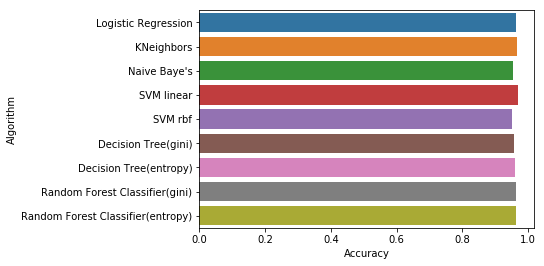

In [139]:
sns.barplot(x = df.Accuracy, y = df.Algorithm)

## Comparison Based On Training Time

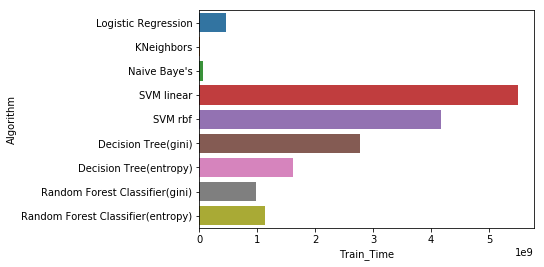

In [140]:
sns.barplot(x = df.Train_Time, y = df.Algorithm)

#### From this we say that SVM takes Maximum Time on Training and KNN takes Minimum Time on Training

## Comparison Based on Prediction Time

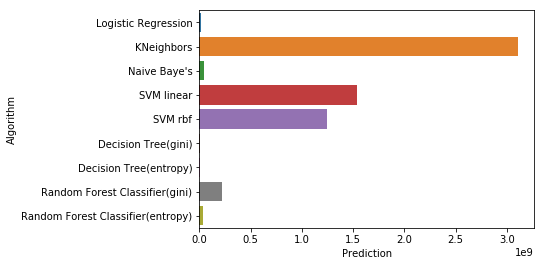

In [141]:
sns.barplot(x = df.Prediction, y = df.Algorithm)

#### From this we say that KNN takes Maximum Prediction Time and Decision Tree takes Minimum Prediction Time